In [57]:
# imports used in go here 
import warnings
warnings.filterwarnings("ignore")
# Tabular data friends:
import pandas as pd
import numpy as np
import math
# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns
# Sklearn stuff:

# Data acquisition
from pydataset import data
import scipy.stats as stats
import seaborn as sns
import numpy as np
import env
import os
import sklearn

from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import acquire
import prepare

In [2]:
# Import data
df = acquire.get_telco_data()

# Initial Explore for Preping and Cleaning Data

### Observations- Initial look at data
* total_charges needs to be converted to a float
* total_charges null values appear to be new cutomers since they have a monthly charge but have yet to be charged. Replce the null's with 0.
* Joiner and duplicate features need to be dropped: Unnamed: 0, payment_type_id, internet_service_type_id
* churn will be the Target feature
* Some payment_type denominations contain in parenthesis the word automatic. These denominations are too long to be used as tick labels in further visualizations. Therefore, we remove this clarification in parenthesis
* dummy colums are needed for ML model
* drop senior_citizen due to small percentage of observations making it a poor predictive feature
* multiple_lines, phone_service, and gender all have mutual information scores near 0, and should be dropped

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [4]:
df.describe(include='all')

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
count,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,7043.000000,7043,7043,7043.000000,...,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043
unique,NaN,NaN,NaN,NaN,7043,2,NaN,2,2,NaN,...,3,3,3,2,NaN,6531,2,3,3,4
top,NaN,NaN,NaN,NaN,0002-ORFBO,Male,NaN,No,No,NaN,...,No,No,No,Yes,NaN,,No,Month-to-month,Fiber optic,Electronic check
freq,NaN,NaN,NaN,NaN,1,3555,NaN,3641,4933,NaN,...,3473,2810,2785,4171,NaN,11,5174,3875,3096,2365
mean,3521.000000,2.315633,1.872923,1.690473,NaN,NaN,0.162147,NaN,NaN,32.371149,...,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,NaN,NaN,NaN
std,2033.283305,1.148907,0.737796,0.833755,NaN,NaN,0.368612,NaN,NaN,24.559481,...,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,NaN,NaN,NaN
25%,1760.500000,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,9.000000,...,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,NaN,NaN,NaN
50%,3521.000000,2.000000,2.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,29.000000,...,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,NaN,NaN,NaN
75%,5281.500000,3.000000,2.000000,2.000000,NaN,NaN,0.000000,NaN,NaN,55.000000,...,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,NaN,NaN,NaN


#### Notes for Prep Function

In [5]:
# Joiner and duplicate features need to be dropped add to prep function
df = df.drop_duplicates()
df = df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id'])
'''
running drop list 
drop(columns=['Unnamed: 0','payment_type_id','internet_service_type_id','contract_type_id','senior_citizen','gender','multiple_lines','phone_service'])
'''

"\nrunning drop list \ndrop(columns=['Unnamed: 0','payment_type_id','internet_service_type_id','contract_type_id','senior_citizen','gender','multiple_lines','phone_service'])\n"

In [6]:
# address total_charges dtype and null values add to prep function
df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)

In [7]:
# remove (automatic) from payment method names add to prep function
df['payment_type'] = df['payment_type'].str.replace(' (automatic)', '', regex=False)

In [8]:
# create colums needed for ML model add to prep function
dummy_df = pd.get_dummies(df[['gender','partner','dependents','tech_support','streaming_tv','streaming_movies', 'paperless_billing','churn','contract_type','internet_service_type','payment_type']], dummy_na=False, drop_first=[True, True])
df = pd.concat([df, dummy_df], axis=1)
'''
running dummy list
dummy_df = pd.get_dummies(df[['partner','dependents','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']],dummy_na=False, drop_first=[True, True])
'''


"\nrunning dummy list\ndummy_df = pd.get_dummies(df[['partner','dependents','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']],dummy_na=False, drop_first=[True, True])\n"

#### Chart for Churn

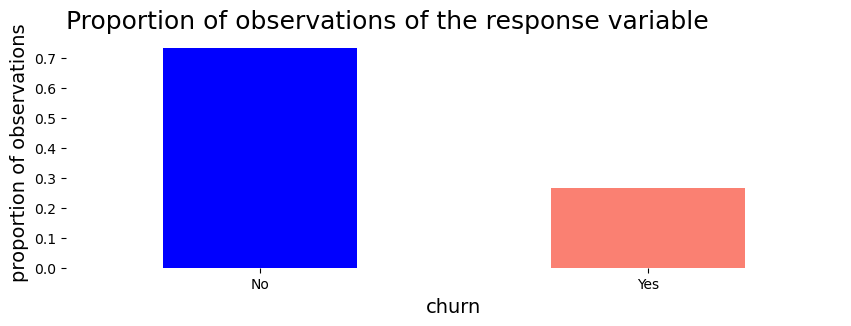

In [9]:
# create a figure
fig = plt.figure(figsize=(10, 3)) 
ax = fig.add_subplot(111)
# proportion of observation of each class
prop_response = df['churn'].value_counts(normalize=True)
# create a bar plot showing the percentage of churn
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['blue','salmon'])
# set title and labels
ax.set_title('Proportion of observations of the response variable',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('proportion of observations',
              fontsize=14)
ax.tick_params(rotation='auto')
# eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

#### Function for Stacked plots- to use for exploration

In [10]:
# Making a function to create a stack plot to explore feature to churn rates
def percentage_stacked_plot(columns_to_plot, super_title):  
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)
    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):
        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df['churn']).apply(lambda x: x/x.sum()*100, axis=1)
        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['blue','salmon'])
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='churn', fancybox=True)
        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')
        ax.tick_params(rotation='auto')
        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

### Chart Demographics

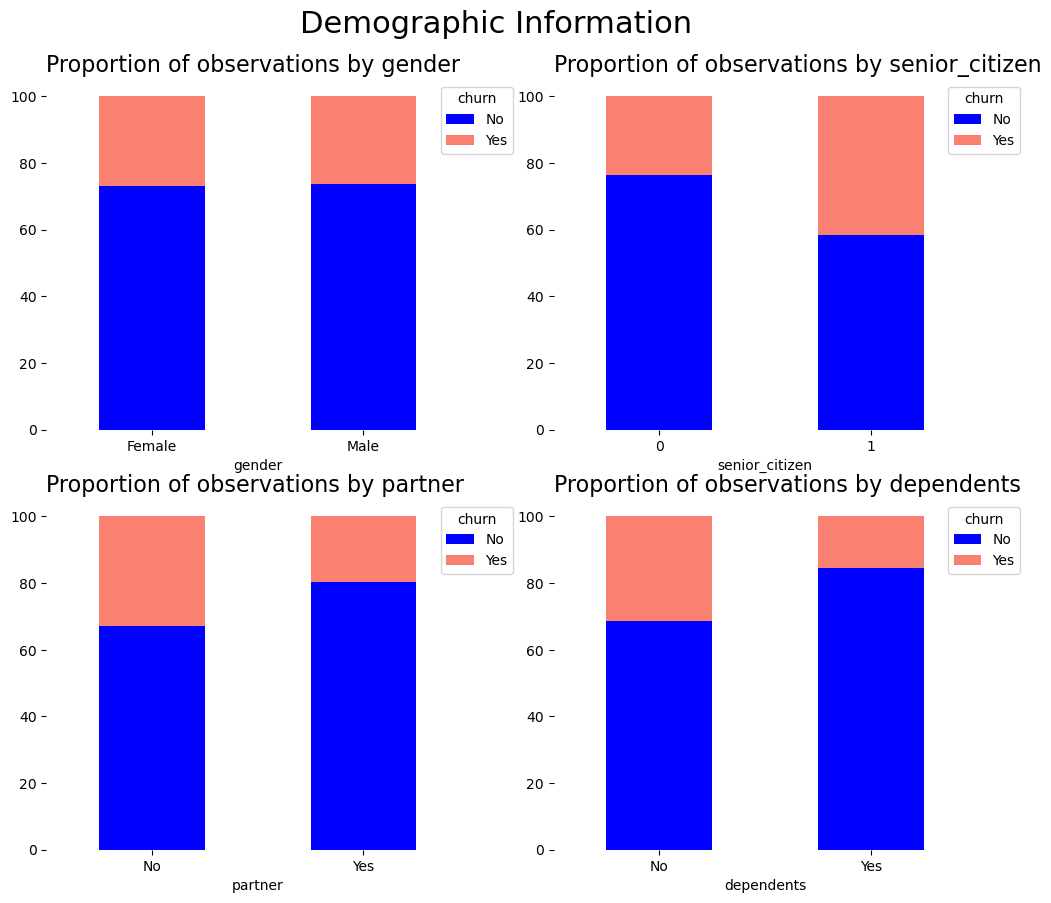

In [11]:
# Lets look at the demographics effect on churn
# demographic column names
demographic_columns = ['gender', 'senior_citizen', 'partner', 'dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

In [12]:
# Is senior_citizen important? What percentage of the observations are they?
(df.senior_citizen.sum())/df.shape[0]

0.1621468124378816

#### Observations: Demographic Features
* gender appears to have no impact 
* senior citizens appear to churn less
    * however, they only make up 16.21% of observation making it an unreliable predictor
* customers with a partner or dependents appear to churn less


### Chart Catagorical Account Info

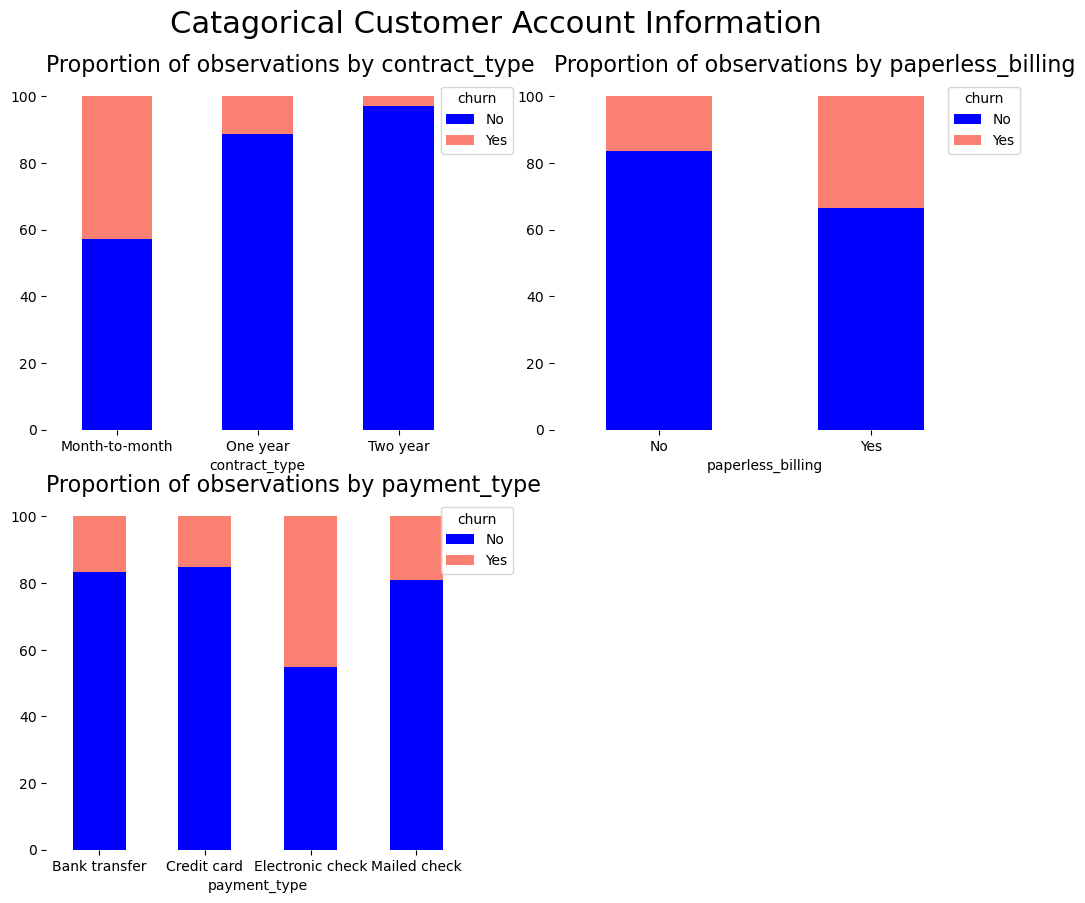

In [13]:
# Let's look into account Information's impact on churn

# customer account column names
account_columns = ['contract_type', 'paperless_billing', 'payment_type']

# stacked plot of catagorical customer account columns
percentage_stacked_plot(account_columns, 'Catagorical Customer Account Information')

#### Observations: Catagorical Account Info
* Month-to-month contracts have higher churn rates compared to clients with yearly contracts
    * This makes since since the barrier to churn while on contract is high
    * This option is not likely to go away, but may be cause to promote contracts to M2M customers
* Customers with electronic check as paying method are more likely to leave the company
* Customers with paperless billing churn more often

### Chart Numerical Account Info

#### Function for Layered Histogram

In [14]:
# lets make some layered histograms to evaluate the numerical cust. acct. features
def histogram_plots(columns_to_plot, super_title):
    '''
    Prints a histogram for each independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    # set number of rows and number of columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)
    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):
        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        # histograms for each class (normalized histogram)
        df[df['churn']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                   alpha=0.5, color='blue', label='No')
        df[df['churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                    alpha=0.5, color='salmon', label='Yes')
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='churn', fancybox=True)
        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')
        ax.tick_params(rotation='auto')
        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
        

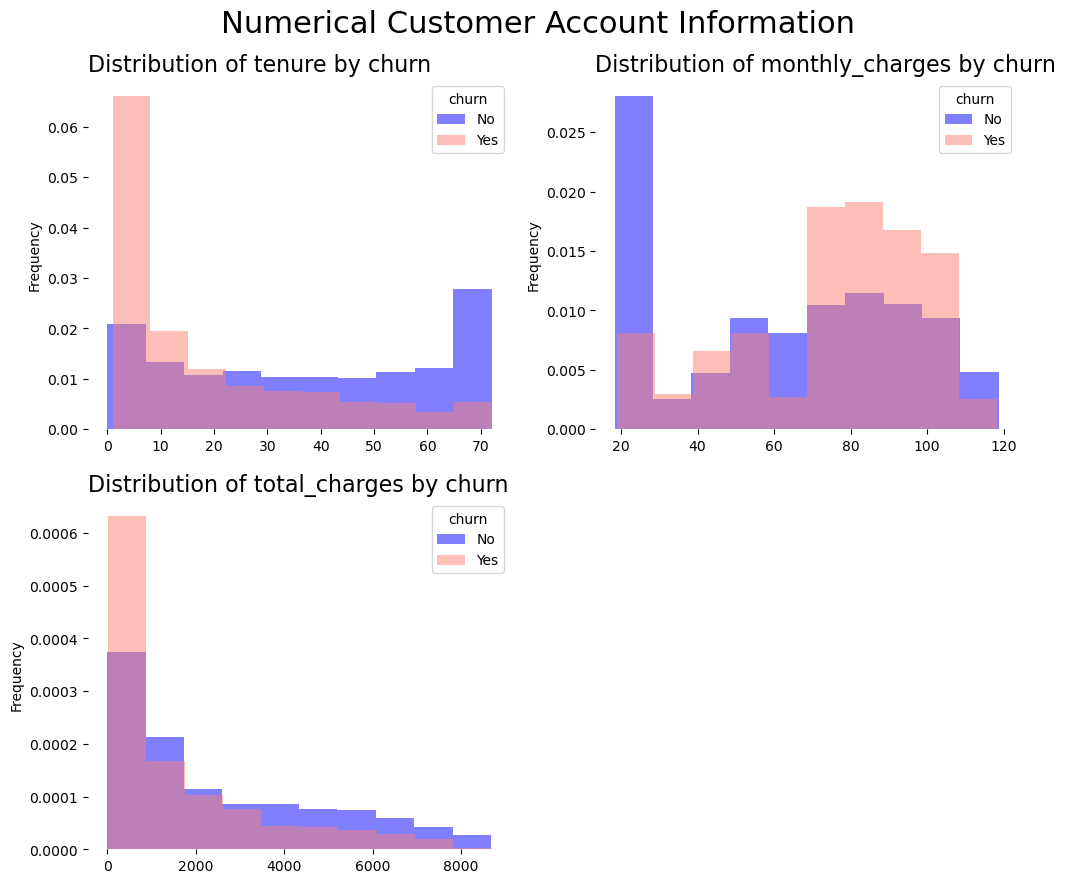

In [15]:
# chart evaluate the numerical cust. acct. features

account_columns_numeric = ['tenure', 'monthly_charges', 'total_charges']
histogram_plots(account_columns_numeric, 'Numerical Customer Account Information')

#### Observations: Numerical Customer Account Information
* High monthly charges appear to lead to higher churn rates
* New customers appera to churn faster than long term customers
* High total charges appear to have lower churn rates
    * this is likely due to tenure of these customers more so than the higher charges 

### Chart Services Information

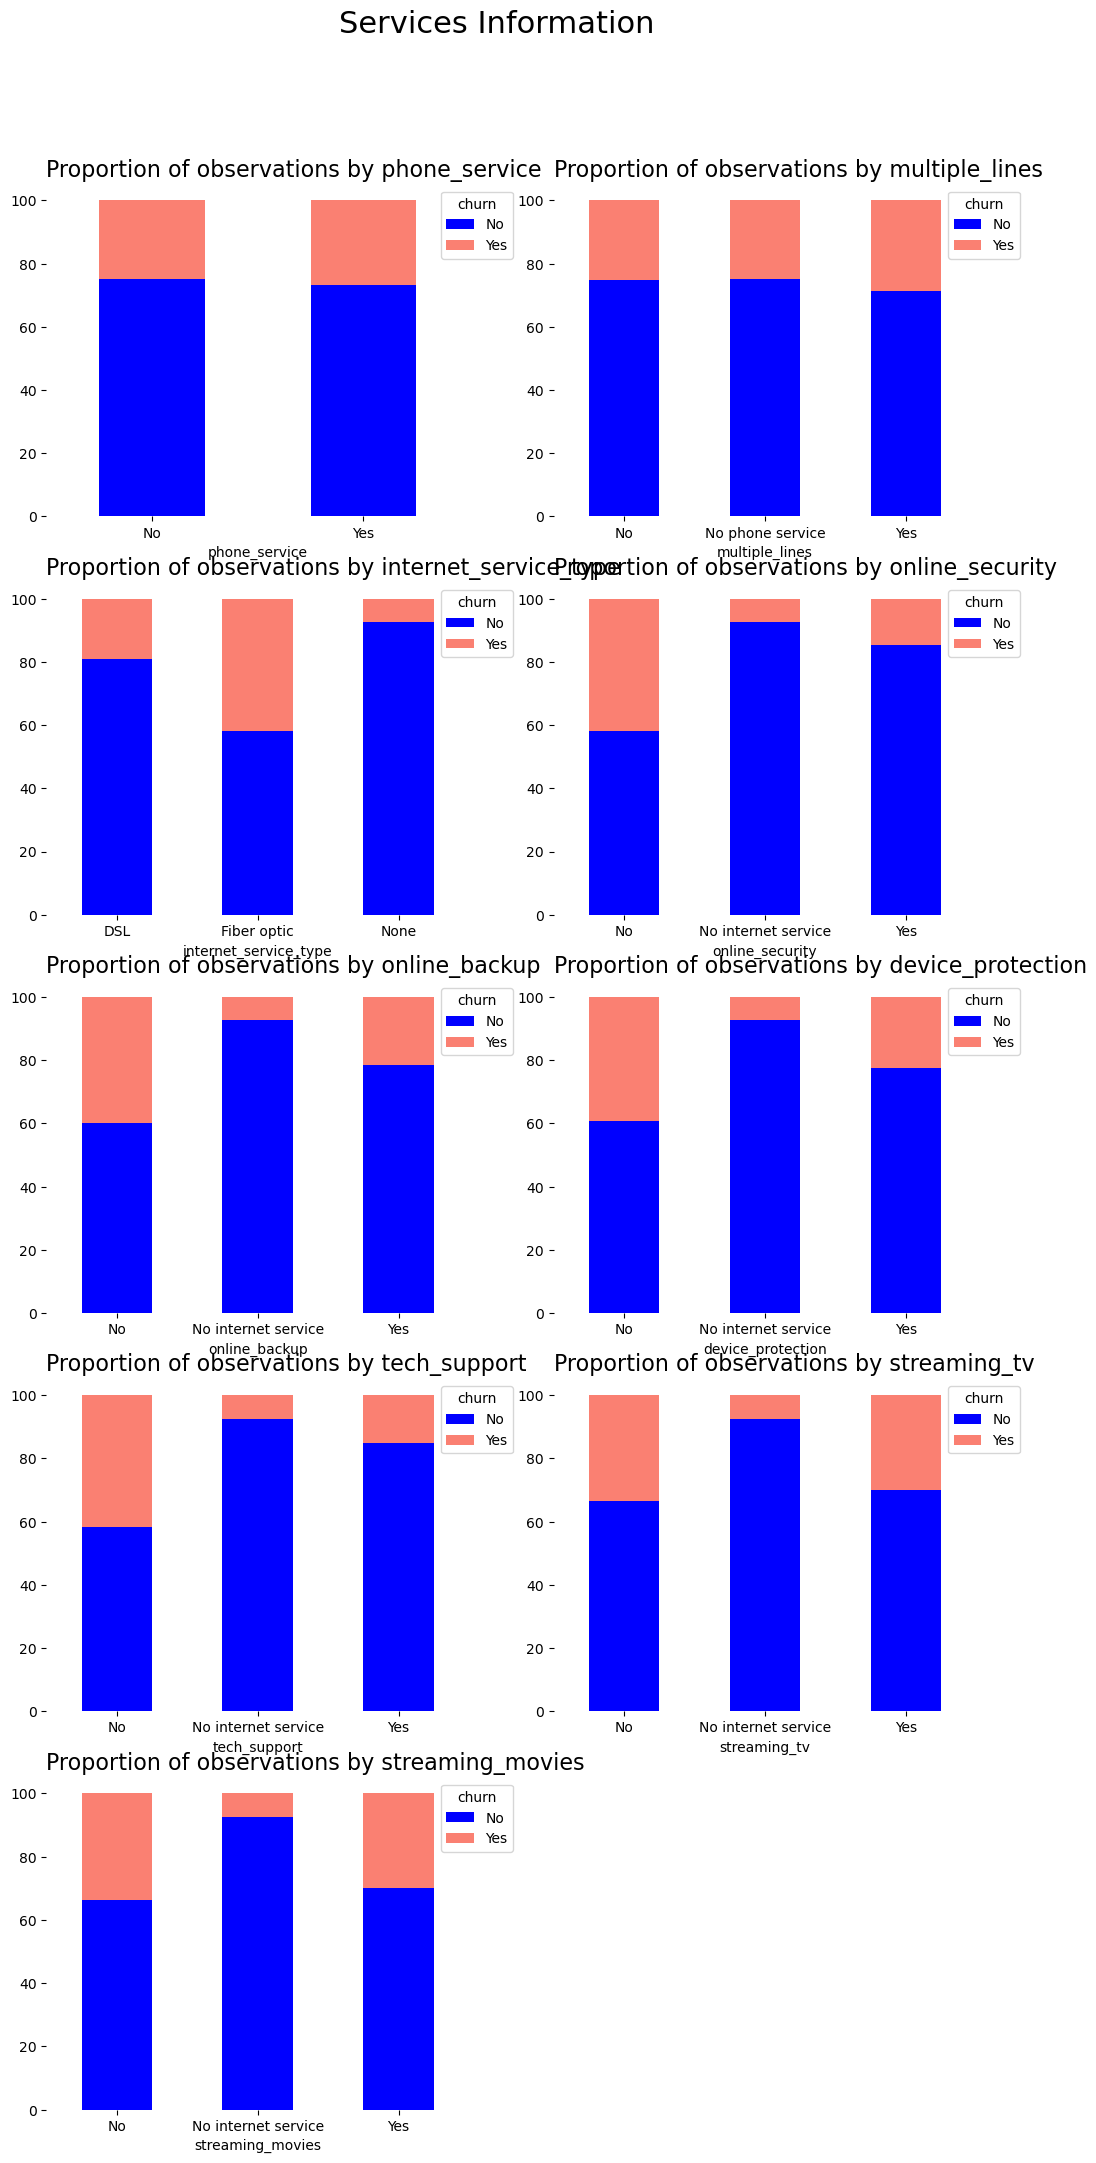

In [16]:
#lets stack some more plots to look at services impact on churn
# services column names
services_columns = ['phone_service', 'multiple_lines', 'internet_service_type', 'online_security',
                   'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
# stacked plot of services columns
percentage_stacked_plot(services_columns, 'Services Information')

#### Observations: Service Information
* phone related features seem to have no real predictive value for churn rates
* having online security appears to reduce churn
* Not having tech support seems to indicate higher churn rates
* Fiber optic customers apperar to churn at a higher rate
* The other feature appear to have a minimal impact on churn rates so we can ignore them

### Check for Catagorical Feature Independence

#### Function for Mutual Infomation Score

In [17]:
#Lets see what catagorical variables are truly independent of chur using mutual information scores to confirm some observations above

# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.churn)

In [18]:
# select categorial variables excluding the response variable 
categorical_variables = df.select_dtypes(include=object).drop('churn', axis=1)
# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)
# visualize feature importance
print(feature_importance)

customer_id              0.578599
contract_type            0.098453
online_security          0.064677
tech_support             0.063021
internet_service_type    0.055574
online_backup            0.046792
payment_type             0.044519
device_protection        0.043917
streaming_movies         0.032001
streaming_tv             0.031908
paperless_billing        0.019194
dependents               0.014467
partner                  0.011454
multiple_lines           0.000801
phone_service            0.000072
gender                   0.000037
dtype: float64


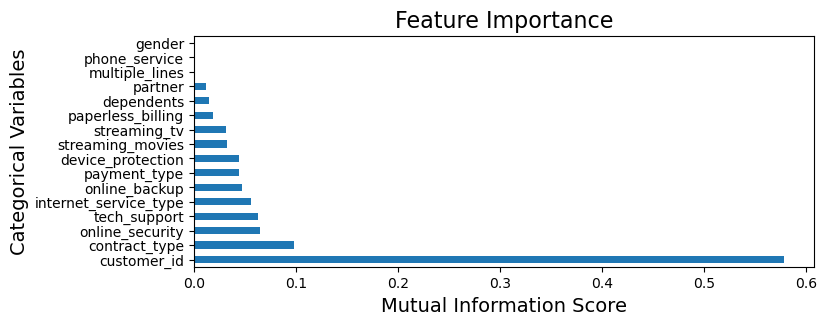

In [19]:
# lets make it a chart to help visualize
ig, ax = plt.subplots(figsize=(8,3))
feature_importance.plot.barh(ax=ax)
ax.set_title('Feature Importance', fontsize=16)
ax.set_xlabel('Mutual Information Score', fontsize=14)
ax.set_ylabel('Categorical Variables', fontsize=14)
plt.show()

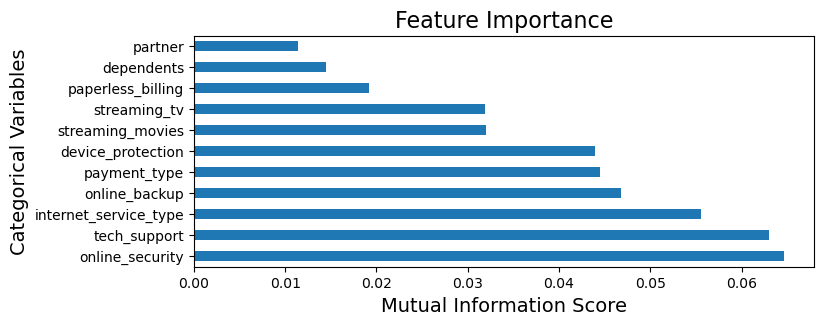

In [20]:
# lets drop irrelevent features to get a better look
categorical_variables2 = df.select_dtypes(include=object).drop(columns=['churn','customer_id','contract_type','gender','phone_service','multiple_lines'], axis=1)
feature_importance = categorical_variables2.apply(compute_mutual_information).sort_values(ascending=False)
ig, ax = plt.subplots(figsize=(8,3))
feature_importance.plot.barh(ax=ax)
ax.set_title('Feature Importance', fontsize=16)
ax.set_xlabel('Mutual Information Score', fontsize=14)
ax.set_ylabel('Categorical Variables', fontsize=14)
plt.show()

#### Observation: Independence Confirmation
* multiple_lines, phone_service, and gender all have mutual information scores near 0 
* this confirms the observations above that they are truly independent of churn
* this means they will not have significant predictive value for churn
* customer_id should be ignored since it is just a key to ID the account
* contract_type should be ignored as well for the reasons mentioned in Observations: Catagorical Account Info


# Explore 

In [21]:
## First lets make a final prep and split function

In [22]:

def final_prep_telco(df):
    '''
    This function will drop any duplicate observations,
    Clean up the total_charges
    drop(columns=['Unnamed: 0', 'payment_type_id', 'internet_service_type_id', 'gender', 'contract_type_id', 'senior_citizen', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'total_charges', 'contract_type'])
    and create dummy vars from 'partner','dependents','tech_support','paperless_billing','churn','contract_type','internet_service_type','payment_type' 
    Then it drops the unneded dummies, and corrects fomatting for internet_service_type_Fiber optic'
    '''
    df = df.drop_duplicates()
    df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)
    df = df.drop(columns=['Unnamed: 0', 'payment_type_id', 'internet_service_type_id', 'gender', 'contract_type_id', 'senior_citizen', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'total_charges', 'contract_type'])
    dummy_df = pd.get_dummies(df[['partner','dependents','tech_support','churn','internet_service_type','payment_type']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    df = df.rename(columns={'internet_service_type_Fiber optic': 'internet_service_type_fiber_optic'})
    df = df.drop(columns=['internet_service_type_None', 'payment_type_Credit card (automatic)','payment_type_Mailed check','tech_support_No internet service','internet_service_type_None'])
    return df

In [23]:
def split_data(df,strat):
    '''
    Be sure to code it as train, validate, test = split_data(df,'column you want to stratify')
    take in a DataFrame and return train, validate, and test DataFrames; stratify on survived.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[{strat}])
    train, validate = train_test_split(train_validate, 
                                       test_size=.25, 
                                       random_state=123, 
                                       stratify=train_validate[{strat}])
    # Validate my split.
    print(f'train -> {train.shape}, {round(train.shape[0]*100 / df.shape[0],2)}%')
    print(f'validate -> {validate.shape},{round(validate.shape[0]*100 / df.shape[0],2)}%')
    print(f'test -> {test.shape}, {round(test.shape[0]*100 / df.shape[0],2)}%')
    return train, validate, test

In [24]:
#Acquire Data
df = acquire.get_telco_data()


In [25]:
#Clean and Prepare Data
df = prepare.final_prep_telco(df)
df.sample()

,customer_id,partner,dependents,tenure,tech_support,paperless_billing,monthly_charges,churn,internet_service_type,payment_type,partner_Yes,dependents_Yes,tech_support_Yes,churn_Yes,internet_service_type_fiber_optic,payment_type_Electronic check
5584,7860-UXCRM,Yes,Yes,63,Yes,No,74.5,No,DSL,Credit card (automatic),1,1,1,0,0,0


In [26]:
# Split
train, validate, test = prepare.split_data(df,'churn')

train -> (4225, 16), 59.99%
validate -> (1409, 16),20.01%
test -> (1409, 16), 20.01%


In [27]:
train.sample()

,customer_id,partner,dependents,tenure,tech_support,paperless_billing,monthly_charges,churn,internet_service_type,payment_type,partner_Yes,dependents_Yes,tech_support_Yes,churn_Yes,internet_service_type_fiber_optic,payment_type_Electronic check
3762,5298-GSTLM,No,No,60,No,Yes,101.4,No,Fiber optic,Bank transfer (automatic),0,0,0,0,1,0


In [28]:
train.shape    

(4225, 16)

## Statistics by Feature Group

### Demographics Statistics
lets do some stats on our remaining demographics: partner and dependents

#### Hypothisis for partner
These are both catagorical features so lets use $\chi^2$ Chi-Square Contingency Table Test <br>
$H_0$ : Churn is independent on marital status<br>
$H_a$ : Churn is dependent on marital status


In [29]:
# create crosstab of observations
observed = pd.crosstab(train.churn, train.partner)
observed

partner,No,Yes
churn,,
No,1439,1665
Yes,722,399


In [30]:
# Get expected values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [31]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')
# print the values from the 'observed' dataframe
print(observed.values)
# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')
# print the expected values array
print(expected.astype(int))
# print a new line
print('---\n')
# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 
# print the p-value, formatted to a float with 4 digits. 
print(f'p-value = {p:.4f}')

Observed Values

[[1439 1665]
 [ 722  399]]
---
Expected Values

[[1587 1516]
 [ 573  547]]
---

chi^2 = 106.6312
p-value = 0.0000


In [32]:
alpha = 0.05

In [33]:
# function for evaluation
def eval_results(p, alpha, group1, group2):
    '''
    this function will take in the p-value, alpha, and a name for the 2 variables 
    you are comparing (group 1 and group 2)
    '''
    if p < alpha:
        print(f'There exists some relationship between {group1} and the {group2}. (p-value: {p})')
    else:
        print(f'There is not a significant relationship between {group1} and {group2}. (p-value: {p})')


In [34]:
# run the evaluation
eval_results(p, alpha, group1='churn', group2='partner')


There exists some relationship between churn and the partner. (p-value: 5.362120825511991e-25)


##### Observation: Partner 
* $\chi^2$ test reveals that there is a relationship between churn and the partner
* Therefore, we reject the $H_0$
    

#### Hypothisis for dependents
These are both catagorical features so lets use $\chi^2$ Chi-Square Contingency Table Test <br>
$H_0$ : Churn is independent on whether or not customers have dependents<br>
$H_a$ : Churn is dependent on whether or not customers have dependents

In [35]:
# Consolidated CHI testing
group1='churn'
group2='dependents'
alpha = 0.05
observed = pd.crosstab(train.churn, train.partner)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}') 
print(f'p-value = {p:.4f}')
eval_results(p, alpha, group1, group2)

Observed Values

[[1439 1665]
 [ 722  399]]
---
Expected Values

[[1587 1516]
 [ 573  547]]
---

chi^2 = 106.6312
p-value = 0.0000
There exists some relationship between churn and the dependents. (p-value: 5.362120825511991e-25)


##### Observation: Partner 
* $\chi^2$ test reveals that there is a relationship between churn and whether or not customers have dependents
* Therefore, we reject the $H_0$

### Catagorical Customer Account Information Statistics
lets do some stats on our remaining Catagorical Customer Account Information: contract_type, paperless_billing, payment_type

#### Hypothisis for contract_type
These are both catagorical features so lets use $\chi^2$ Chi-Square Contingency Table Test <br>
$H_0$ : Churn is independent of contract_type<br>
$H_a$ : Churn is dependent of contract_type

In [36]:
# Consolidated CHI testing
group1='churn'
group2='contract_type'
alpha = 0.05
observed = pd.crosstab(train.churn, train.partner)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}') 
print(f'p-value = {p:.4f}')
eval_results(p, alpha, group1, group2)

Observed Values

[[1439 1665]
 [ 722  399]]
---
Expected Values

[[1587 1516]
 [ 573  547]]
---

chi^2 = 106.6312
p-value = 0.0000
There exists some relationship between churn and the contract_type. (p-value: 5.362120825511991e-25)


##### Observation: contract_type 
* $\chi^2$ test reveals that there is a relationship between churn and contract_type
* Therefore, we reject the $H_0$

#### Hypothisis for paperless_billing
These are both catagorical features so lets use $\chi^2$ Chi-Square Contingency Table Test <br>
$H_0$ : Churn is independent of paperless_billing<br>
$H_a$ : Churn is dependent of paperless_billing

In [37]:
# Consolidated CHI testing
group1='churn'
group2='paperless_billing'
alpha = 0.05
observed = pd.crosstab(train.churn, train.partner)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}') 
print(f'p-value = {p:.4f}')
eval_results(p, alpha, group1, group2)

Observed Values

[[1439 1665]
 [ 722  399]]
---
Expected Values

[[1587 1516]
 [ 573  547]]
---

chi^2 = 106.6312
p-value = 0.0000
There exists some relationship between churn and the paperless_billing. (p-value: 5.362120825511991e-25)


##### Observation: paperless_billing 
* $\chi^2$ test reveals that there is a relationship between churn and paperless_billing
* Therefore, we reject the $H_0$

#### Hypothisis for payment_type
These are both catagorical features so lets use $\chi^2$ Chi-Square Contingency Table Test <br>
$H_0$ : Churn is independent of payment_type<br>
$H_a$ : Churn is dependent of payment_type

In [38]:
# Consolidated CHI testing
group1='churn'
group2='payment_type'
alpha = 0.05
observed = pd.crosstab(train.churn, train.partner)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}') 
print(f'p-value = {p:.4f}')
eval_results(p, alpha, group1, group2)

Observed Values

[[1439 1665]
 [ 722  399]]
---
Expected Values

[[1587 1516]
 [ 573  547]]
---

chi^2 = 106.6312
p-value = 0.0000
There exists some relationship between churn and the payment_type. (p-value: 5.362120825511991e-25)


##### Observation: payment_type 
* $\chi^2$ test reveals that there is a relationship between churn and payment_type
* Therefore, we reject the $H_0$

### Numerical Customer Account Information Statistics
lets do some stats on our remaining Numerical Customer Account Information Statistics: tenure, monthly_charges

#### Hypothisis for tenure
Churn is catagorical, and tenure is a continuous number features so lets do a One Sample T-Test<br>
$H_0$ : The mean tenure of churned customers is = the mean tenure of all churned customers<br>
$H_a$ : The mean tenure of churned customers is != the mean tenure of all churned customers

In [39]:
# first establish means and alpha
alpha = .05
train.churn.value_counts()

No     3104
Yes    1121
Name: churn, dtype: int64

In [40]:
# One Sample T-Test
churn_sample = train[train.churn == 'Yes'].tenure
overall_mean = train.tenure.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)
t, p

(-24.280881230430392, 5.680256511980203e-105)

In [41]:
# For a 2-tailed test, we take the p-value as is
if p == alpha:
    print("We fail to reject Null Hypothisis")
else:
    print("We reject Null Hypothisis")

We reject Null Hypothisis


##### Observation: tenure 
* One Sample T-Test reveals that there is a significant relationship between churn and tenure
* Therefore, we reject the $H_0$
* This mens there is a significant relationship between churn and tenure

#### Hypothisis for monthly_charges
Churn is catagorical, and tenure is a continuous number features so lets do a One Sample T-Test <br>
$H_0$ : Mean of monthly charges of churned customers <= Mean of monthly charges of all customers<br>
$H_a$ : Mean of monthly charges of churned customers > Mean of monthly charges of all customers

In [42]:
# One Sample T-Test
churn_sample = train[train.churn == 'Yes'].monthly_charges
overall_mean = train.monthly_charges.mean()
t, p = stats.ttest_1samp(churn_sample, overall_mean)
print(t, p/2, alpha)

12.65294490503547 1.0740986591134452e-34 0.05


In [43]:
# For a 1-tailed test, we evaluate p/2 < α and t > 0(to test if higher)

if p/2 > alpha:
    print("We fail to reject Null Hypothisis")
elif t < 0:
    print("We fail to reject Null Hypothisis")
else:
    print("We reject Null Hypothisis")


We reject Null Hypothisis


##### Observation: monthly_charges 
* One Sample T-Test reveals that mean of monthly charges of churned customers is greater than the mean of monthly charges of all customers
* Therefore, we reject the $H_0$
* This indicates that customers wigh higher monthly charges do churn more than average

### Service Features Statistics
lets do some stats on our most impactful service features: internet_service_type_fiber_optic, tech_support_Yes

#### Hypothisis for internet_service_type_fiber_optic
These are both catagorical features so lets use $\chi^2$ Chi-Square Contingency Table Test <br>
$H_0$ : Churn is independent of internet_service_type_fiber_optic<br>
$H_a$ : Churn is dependent of internet_service_type_fiber_optic


In [44]:
# Consolidated CHI testing
group1='churn'
group2='internet_service_type_fiber_optic'
alpha = 0.05
observed = pd.crosstab(train.churn, train.internet_service_type_fiber_optic)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}') 
print(f'p-value = {p:.4f}')
eval_results(p, alpha, group1, group2)

Observed Values

[[2022 1082]
 [ 348  773]]
---
Expected Values

[[1741 1362]
 [ 628  492]]
---

chi^2 = 387.4117
p-value = 0.0000
There exists some relationship between churn and the internet_service_type_fiber_optic. (p-value: 3.0293763443640615e-86)


##### Observation: internet_service_type_fiber_optic 
* $\chi^2$ test reveals that there is a relationship between churn and internet_service_type_fiber_optic
* Therefore, we reject the $H_0$

#### Hypothisis for tech_support_Yes
These are both catagorical features so lets use $\chi^2$ Chi-Square Contingency Table Test <br>
$H_0$ : Churn is independent of tech_support_Yes<br>
$H_a$ : Churn is dependent of tech_support_Yes

In [45]:
# Consolidated CHI testing
group1='churn'
group2='tech_support_Yes'
alpha = 0.05
observed = pd.crosstab(train.churn, train.tech_support_Yes)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}') 
print(f'p-value = {p:.4f}')
eval_results(p, alpha, group1, group2)

Observed Values

[[2076 1028]
 [ 926  195]]
---
Expected Values

[[2205  898]
 [ 796  324]]
---

chi^2 = 98.2309
p-value = 0.0000
There exists some relationship between churn and the tech_support_Yes. (p-value: 3.7233642021021574e-23)


##### Observation: tech_support_Yes 
* $\chi^2$ test reveals that there is a relationship between churn and tech_support_Yes
* Therefore, we reject the $H_0$

#### A few more charts

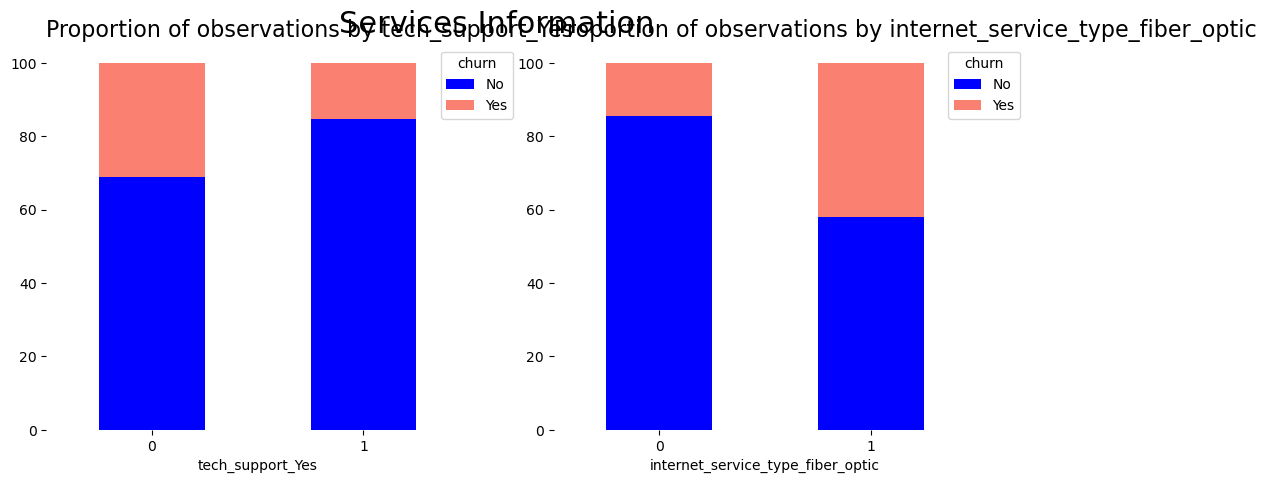

In [46]:
#lets stack some more plots to look at services impact on churn
# services column names
services_columns2 = ['tech_support_Yes','internet_service_type_fiber_optic']
# stacked plot of services columns
percentage_stacked_plot(services_columns2, 'Services Information')

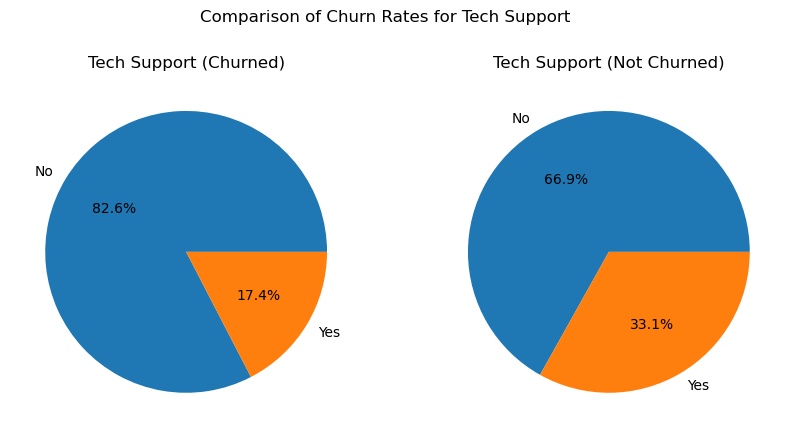

In [47]:
# split the data by churn status
churned = train[train['churn'] == 'Yes']
not_churned = train[train['churn'] == 'No']

# create two subplots for the two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# create the first pie chart for 'tech_support_Yes' among churned customers
ax1.pie(churned['tech_support_Yes'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
ax1.set_title('Tech Support (Churned)')

# create the second pie chart for 'tech_support_Yes' among non-churned customers
ax2.pie(not_churned['tech_support_Yes'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
ax2.set_title('Tech Support (Not Churned)')

# add a title for the overall plot
fig.suptitle('Comparison of Churn Rates for Tech Support')

plt.show()
#This one was not very helpful

# Modeling

## Create X & y Versions

In [49]:
train.sample()

,customer_id,partner,dependents,tenure,tech_support,paperless_billing,monthly_charges,churn,internet_service_type,payment_type,partner_Yes,dependents_Yes,tech_support_Yes,churn_Yes,internet_service_type_fiber_optic,payment_type_Electronic check
499,0730-BGQGF,Yes,Yes,71,Yes,No,90.3,No,DSL,Credit card (automatic),1,1,1,0,0,0


In [50]:

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(['churn_Yes','churn','customer_id','partner','dependents','tech_support','paperless_billing','internet_service_type','payment_type'], axis=1)
y_train = train.churn_Yes

X_validate = validate.drop(['churn_Yes','churn','customer_id','partner','dependents','tech_support','paperless_billing','internet_service_type','payment_type'], axis=1)
y_validate = validate.churn_Yes

X_test = test.drop(['churn_Yes','churn','customer_id','partner','dependents','tech_support','paperless_billing','internet_service_type','payment_type'], axis=1)
y_test = test.churn_Yes


In [53]:
X_train.sample()

,tenure,monthly_charges,partner_Yes,dependents_Yes,tech_support_Yes,internet_service_type_fiber_optic,payment_type_Electronic check
4789,35,108.95,0,0,1,1,1


## Determin the Baseline Prediction

In [54]:
#baseline_prediction = y_train.mode()
# Predict the majority class in the training set
baseline_pred = [0] * len(y_train)
print('Baseline accuracy:', accuracy_score(y_train, baseline_pred))

Baseline accuracy: 0.7346745562130178


In [58]:
def create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''
    models = []
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [60]:
# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: k_nearest_neighbors, Accuracy: 0.7721788502484032)
Classifier: logistic_regression, Accuracy: 0.8126330731014905)
Classifier: DecisionTreeClassifier, Accuracy: 0.7317246273953159)
Classifier: random_forest, Accuracy: 0.7750177430801988)
